In [14]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
from imdb import Cinemagoer

In [2]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

### relevant fields:

**Keys**
- 'imdbID',
- 'title',

**Meta Data**
- 'original title',
- 'rating',
- 'director',
- 'runtimes',
- 'genres',
- 'box office',
- 'cover url',
- 'year', 
- 'top 250 rank',
- 'awards',
- 'akas',
- 'cast',

**Geo**
- 'country codes'
- 'countries',
- 'locations',
- 'language codes',


**Text**
- 'plot',
- 'plot outline',
- 'critic reviews',
- 'reviews',
- 'quotes'

In [3]:
'awards'  ???

SyntaxError: invalid syntax (<ipython-input-3-b8e4ab6ae799>, line 1)

# Get Movie Data

In [109]:
from profanity_detector.get_data import movie_data, get_all_movie_data, run_and_display

In [114]:
movie_meta, quotes_df, reviews_df, locations_df = movie_data('cinderella')

In [115]:
movie_meta

{'imdb_id': '1661199',
 'title': 'Cinderella',
 'rating': 6.9,
 'director': ['Kenneth Branagh'],
 'runtime': '105 Min',
 'genres': ['Adventure', 'Drama', 'Family', 'Fantasy', 'Romance'],
 'year': 2015,
 'box_office': '$543,514,353',
 'top_250_rank': "Didn't make it here yet...",
 'cast': ['Cate Blanchett',
  'Lily James',
  'Richard Madden',
  'Helena Bonham Carter',
  'Nonso Anozie',
  'Stellan Skarsgård',
  'Sophie McShera',
  'Holliday Grainger',
  'Derek Jacobi',
  'Ben Chaplin',
  'Hayley Atwell',
  'Rob Brydon',
  'Jana Pérez',
  'Alex Macqueen',
  'Tom Edden',
  'Gareth Mason',
  'Paul Hunter',
  'Eloise Webb',
  'Joshua McGuire',
  'Matthew Steer',
  'Mimi Ndiweni',
  'Laura Elsworthy',
  'Ella Smith',
  'Ann Davies',
  'Gerard Horan',
  'Katie West',
  'Daniel Tuite',
  'Anjana Vasan',
  'Stuart Neal',
  'Tomiwa Edun',
  'Richard McCabe',
  'Joseph Kloska',
  'Andy Apollo',
  'Craig Mather',
  'Jonny Owen-Last',
  'Nari Blair-Mangat',
  'Michael Jenn',
  "Josh O'Connor",
  'An

In [116]:
quotes_df.head()

,imdb_id,title,content
0,1661199,Cinderella,_Cinderella_ (qv): Just because it's what's do...
1,1661199,Cinderella,Ella's Mother: I have to tell you a secret tha...
2,1661199,Cinderella,"Ella's Mother: When there is kindness, there i..."
3,1661199,Cinderella,Fairy Godmother: I'm your Hairy Dogfather... O...
4,1661199,Cinderella,"Goose Coachman: I can't drive, I'm a goose."


In [117]:
reviews_df.head()

,content,helpful,title,author,date,rating,not_helpful,imdb_id
0,"The trailer was a mixed bag, one where the pro...",18,Cinderella,ur20552756,31 March 2015,9.0,31,1661199
1,CINDERELLA is another in a recent series of li...,3,Cinderella,ur0482513,28 December 2017,4.0,6,1661199
2,Cinderella (2015) **** (out of 4) After the su...,8,Cinderella,ur13134536,13 March 2015,NaN,35,1661199
3,Ella (Lily James) had loving parents who taugh...,1,Cinderella,ur2898520,5 January 2016,7.0,12,1661199
4,it preserves the spirit of the original in a w...,7,Cinderella,ur61197531,26 September 2015,NaN,13,1661199


In [118]:
locations_df.head()

,locations,imdb_id,title
0,"Old Royal Naval College, Greenwich, London, En...",1661199,Cinderella
1,"Blenheim Palace, Woodstock, Oxfordshire, Engla...",1661199,Cinderella
2,"Black Park, Iver Heath, Buckinghamshire, Engla...",1661199,Cinderella
3,"Cliveden House, Taplow, Buckinghamshire, Engla...",1661199,Cinderella
4,"Pinewood Studios, Iver Heath, Buckinghamshire,...",1661199,Cinderella


In [119]:
from profanity_detector.movie_features import create_word_cloud, plot_word_cloud

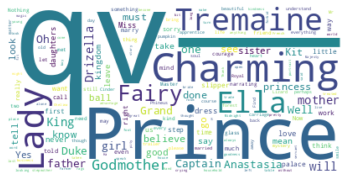

In [120]:
plot_word_cloud(create_word_cloud(quotes_df))

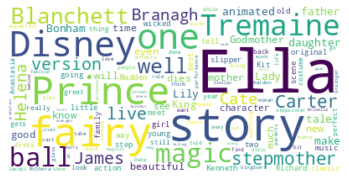

In [121]:
plot_word_cloud(create_word_cloud(reviews_df))

What Is Your Favourite Movie? : aladin
Movie Details: 
 {'imdb_id': '6139732', 'title': 'Aladdin', 'rating': 6.9, 'director': ['Guy Ritchie'], 'runtime': '128 Min', 'genres': ['Adventure', 'Comedy', 'Family', 'Fantasy', 'Musical', 'Romance'], 'year': 2019, 'box_office': '$1,050,693,953', 'top_250_rank': "Didn't make it here yet...", 'cast': ['Will Smith', 'Mena Massoud', 'Naomi Scott', 'Marwan Kenzari', 'Navid Negahban', 'Nasim Pedrad', 'Billy Magnussen', 'Jordan A. Nash', 'Taliyah Blair', 'Aubrey Lin', 'Amir Boutrous', 'Numan Acar', 'Omari Bernard', 'Nathaniel Ellul', 'Sebastien Torkia', 'Buckso Dhillon-Woolley', 'Ceara Batson', 'Vinani Mwazanzale', 'Demii Lee Walker', 'Elena Zacharia', 'Nazerene Williams', 'Bessy Naidu', 'Marisha Wallace', 'Maya Saroya', 'Amar Chadha-Patel', 'Omar Abidi', 'Stefan Kalipha', 'Firas Taybeh', 'Nina Wadia', 'Elif Knight', 'Saikat Ahamed', 'Amed Hashimi', 'Stefan Capper', 'Jamal Sims', 'Alan Tudyk', 'Frank Welker', 'Fabio Abraham', 'Lee Admassie', 'Nicky A

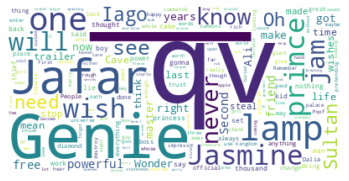

In [123]:
run_and_display()